**Load libraries**

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Sklearn module and classes
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt

**Load dataset**

In [96]:
#data = pd.read_csv("/content/drive/MyDrive/ML/Iris.csv")
data = pd.read_csv("/content/drive/MyDrive/ML/udemy_courses.csv")

In [ ]:
data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


**Descriptive statistics**

In [ ]:
data.shape

(3678, 12)

In [ ]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [ ]:
data.head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,True,150,9221,138,25,All Levels,3.0,2014-05-02T15:13:30Z,Business Finance
6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,True,65,1540,178,26,Beginner Level,1.0,2016-02-21T18:23:12Z,Business Finance
7,403100,"Trading Stock Chart Patterns For Immediate, Ex...",https://www.udemy.com/trading-chart-patterns-f...,True,95,2917,148,23,All Levels,2.5,2015-01-30T22:13:03Z,Business Finance
8,476268,Options Trading 3 : Advanced Stock Profit and ...,https://www.udemy.com/day-trading-stock-option...,True,195,5172,34,38,Expert Level,2.5,2015-05-28T00:14:03Z,Business Finance
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,True,200,827,14,15,All Levels,1.0,2017-04-18T18:13:32Z,Business Finance


In [ ]:
data.tail(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3668,270976,A how to guide in HTML,https://www.udemy.com/a-how-to-guide-in-html/,False,0,7318,205,8,Beginner Level,0.583333,2014-08-10T20:19:10Z,Web Development
3669,679992,Building Better APIs with GraphQL,https://www.udemy.com/building-better-apis-wit...,True,50,555,89,16,All Levels,2.500000,2015-11-29T22:02:02Z,Web Development
3670,330900,Learn Grunt with Examples: Automate Your Front...,https://www.udemy.com/learn-grunt-automate-you...,True,20,496,113,17,All Levels,1.000000,2014-12-19T21:38:54Z,Web Development
3671,667122,Build A Stock Downloader With Visual Studio 20...,https://www.udemy.com/csharpyahoostockdownloader/,True,20,436,36,22,Intermediate Level,1.500000,2015-11-19T17:22:47Z,Web Development
3672,865438,jQuery UI in Action: Build 5 jQuery UI Projects,https://www.udemy.com/jquery-ui-practical-buil...,True,150,382,28,140,All Levels,15.500000,2016-10-10T22:00:32Z,Web Development
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.000000,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.500000,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.500000,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.000000,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.000000,2014-09-28T19:51:11Z,Web Development


In [ ]:
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [ ]:
data.info

<bound method DataFrame.info of       course_id                                       course_title  \
0       1070968                 Ultimate Investment Banking Course   
1       1113822  Complete GST Course & Certification - Grow You...   
2       1006314  Financial Modeling for Business Analysts and C...   
3       1210588  Beginner to Pro - Financial Analysis in Excel ...   
4       1011058       How To Maximize Your Profits Trading Options   
...         ...                                                ...   
3673     775618  Learn jQuery from Scratch - Master of JavaScri...   
3674    1088178  How To Design A WordPress Website With No Codi...   
3675     635248                      Learn and Build using Polymer   
3676     905096  CSS Animations: Create Amazing Effects on Your...   
3677     297602  Using MODX CMS to Build Websites: A Beginner's...   

                                                    url  is_paid  price  \
0     https://www.udemy.com/ultimate-investment-bank

In [ ]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [ ]:
data['is_paid'].value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

**Data visualizations**

<Axes: xlabel='subject', ylabel='count'>

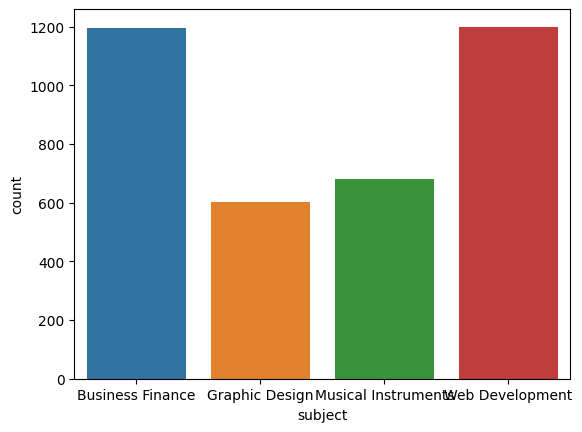

In [ ]:
import seaborn as sns
sns.countplot(x=data["subject"])

In [ ]:
data['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

<Axes: >

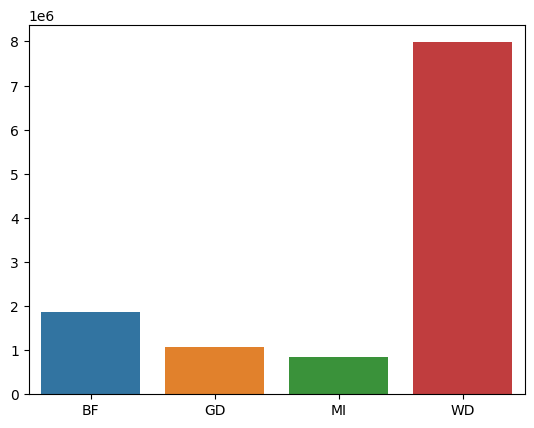

In [ ]:
sum_bf= sum(data[data['subject']=='Business Finance']['num_subscribers'])
sum_gd= sum(data[data['subject']=='Graphic Design']['num_subscribers'])
sum_mi= sum(data[data['subject']=='Musical Instruments']['num_subscribers'])
sum_wd= sum(data[data['subject']=='Web Development']['num_subscribers'])

sns.barplot(y=[sum_bf,sum_gd,sum_mi,sum_wd],x=['BF','GD','MI','WD'])

<Axes: ylabel='is_paid'>

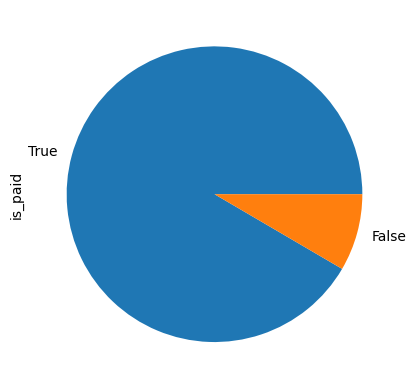

In [ ]:
data['is_paid'].value_counts().plot.pie()

In [ ]:
data['Year'] = data['published_timestamp'].apply(lambda x: x[0:4])

In [ ]:
data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development,2016
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development,2017
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development,2015
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development,2016


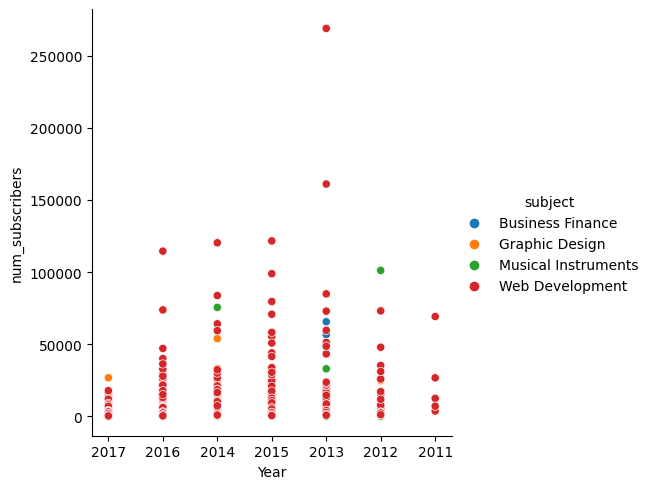

In [ ]:
sns.relplot(data=data,x="Year",y="num_subscribers",hue="subject")

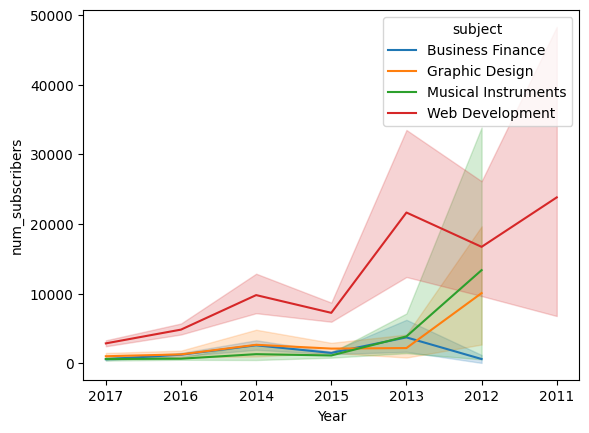

In [ ]:
gfg=sns.lineplot(x="Year", y="num_subscribers",data=data,hue="subject")



In [ ]:
year=[2011,2012,2013,2014,2015,2016,2017,2018]
data["year"]=data['published_timestamp']
for i in range(len(data['year'])):
  data['year'][i]=data['year'][i][:4]

<Axes: xlabel='content_duration', ylabel='num_subscribers'>

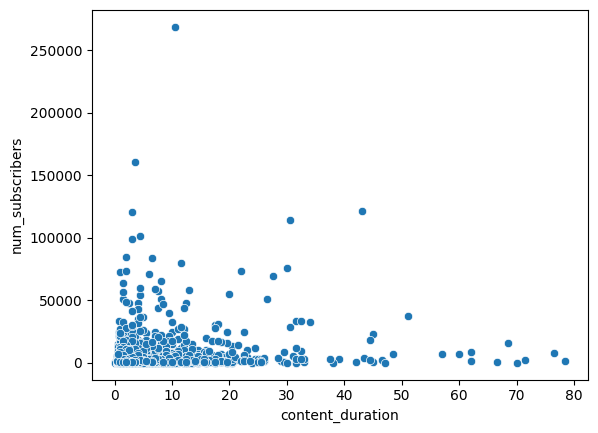

In [ ]:
sns.scatterplot(data=data,x="content_duration",y="num_subscribers")

<Axes: xlabel='price', ylabel='num_subscribers'>

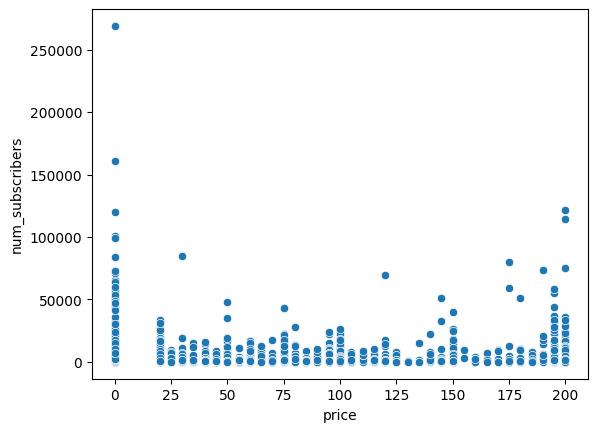

In [ ]:
sns.scatterplot(data=data,x="price",y="num_subscribers")

<Axes: xlabel='num_lectures', ylabel='num_subscribers'>

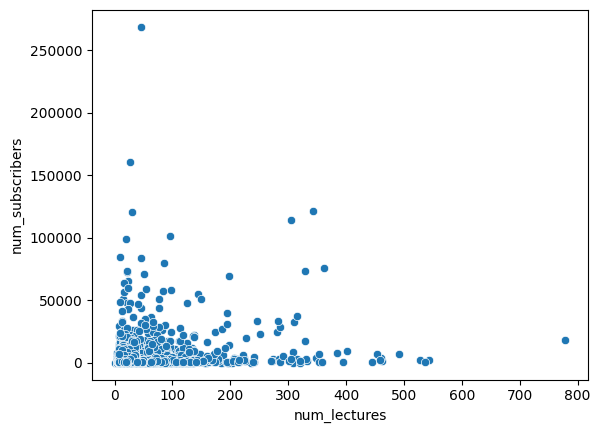

In [ ]:
sns.scatterplot(data=data,x="num_lectures",y="num_subscribers")

**preprocessing**

In [97]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Assuming 'is_paid' is the column you want to convert to numerical labels
column_to_factorize = ['is_paid']

# Custom function to perform the factorization
def factorize_column(data):
    data['is_paid'] = pd.factorize(data['is_paid'])[0]
    return data

# Create the pipeline with the custom transformer
pipeline = Pipeline(steps=[
    ('factorize', FunctionTransformer(factorize_column))
])

# Fit and transform the data using the pipeline
data = pipeline.fit_transform(data)



In [ ]:
data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,0,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,0,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,0,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,0,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,0,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,0,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,0,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,0,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,0,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [98]:
X = data[["num_subscribers","num_lectures", "num_reviews","content_duration"]]
y = data["is_paid"]

In [ ]:
X,y

(      num_subscribers  num_lectures  num_reviews  content_duration
 0                2147            51           23               1.5
 1                2792           274          923              39.0
 2                2174            51           74               2.5
 3                2451            36           11               3.0
 4                1276            26           45               2.0
 ...               ...           ...          ...               ...
 3673             1040            21           14               2.0
 3674              306            42            3               3.5
 3675              513            48          169               3.5
 3676              300            38           31               3.0
 3677              901            20           36               2.0
 
 [3678 rows x 4 columns],
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3673    0
 3674    0
 3675    0
 3676    0
 3677    0
 Name: is_paid, Length: 3678, dtype

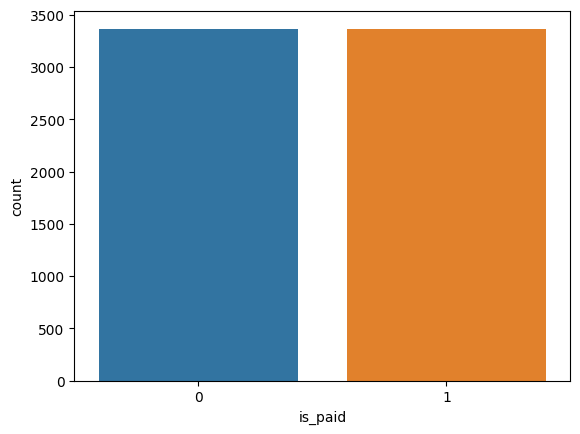

In [99]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedBaggingClassifier
RandomSa = RandomOverSampler(sampling_strategy = "not majority")
x_res, y_res = RandomSa.fit_resample(X, y)

sns.countplot(x=y_res)
plt.show()

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3)

In [ ]:
'''pipeline_lr = Pipeline([
    ('scaler1', StandardScaler()),
    ('lr_classifier',LogisticRegression(random_state=0))
])'''

pipeline_lr=LogisticRegression(random_state = 42)

In [ ]:
pipeline_lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = pipeline_lr.predict(X_test)
x_pred= pipeline_lr.predict(X_train)

In [ ]:

f1_score(y_test,y_pred,average='macro')


0.7735144780738429

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[871 163]
 [281 706]]


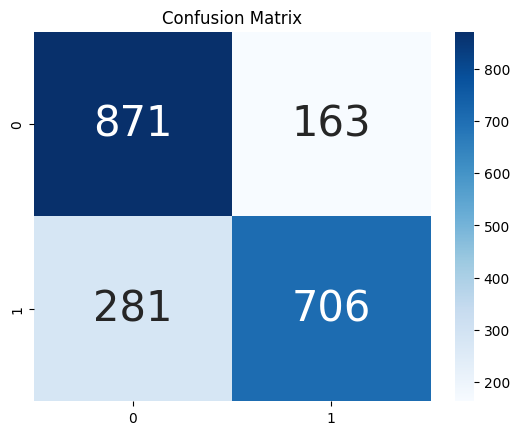

In [ ]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [115]:
f=np.array([[50855,2698,15,1.5]])
print(pipeline_lr.predict(f))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Decision tree**

In [ ]:
tree_clf=tree.DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_pred=tree_clf.predict(X_test)

In [ ]:
x_pred=tree_clf.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(x_pred,y_train)
test_acc=accuracy_score(y_pred,y_test)

print(train_acc,test_acc)

0.7872746553552492 0.7812963879267689


In [ ]:
f1_score(y_test,y_pred,average='macro')

0.7801331681940086

[Text(0.5, 0.8333333333333334, 'x[0] <= 1684.0\ngini = 0.5\nsamples = 4715\nvalue = [2334, 2381]'),
 Text(0.25, 0.5, 'x[0] <= 333.5\ngini = 0.315\nsamples = 2085\nvalue = [1676, 409]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.118\nsamples = 984\nvalue = [922, 62]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.432\nsamples = 1101\nvalue = [754, 347]'),
 Text(0.75, 0.5, 'x[1] <= 32.5\ngini = 0.375\nsamples = 2630\nvalue = [658, 1972]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.265\nsamples = 2058\nvalue = [323, 1735]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.485\nsamples = 572\nvalue = [335, 237]')]

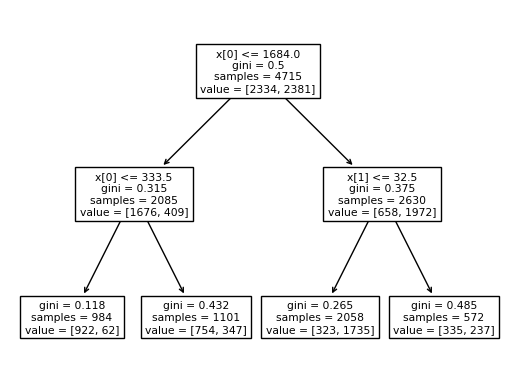

In [ ]:
tree.plot_tree(tree_clf)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1010
           1       0.86      0.71      0.78      1011

    accuracy                           0.80      2021
   macro avg       0.81      0.80      0.80      2021
weighted avg       0.81      0.80      0.80      2021



In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
data_tree = {

"Test Percentage" : [0.2, .3, .4],
"precision" : [],
"recall" : [],
"F1" : [],
}
for per in [0.2, 0.3, 0.4]:
  x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=per, random_state= 10)
  clf = DecisionTreeClassifier(random_state=2)
  clf.fit(x_train, y_train)
  prediction = clf.predict(x_test)
  data_tree["precision"].append(precision_score(y_test, prediction,average='macro'))
  data_tree["recall"].append(recall_score(y_test, prediction,average='macro'))
  data_tree["F1"].append(f1_score(y_test, prediction, average='macro'))

,precision,recall,F1
Test Percentage,,,
0.2,0.975895,0.973364,0.973967
0.3,0.967787,0.966143,0.965836
0.4,0.969076,0.966914,0.966936


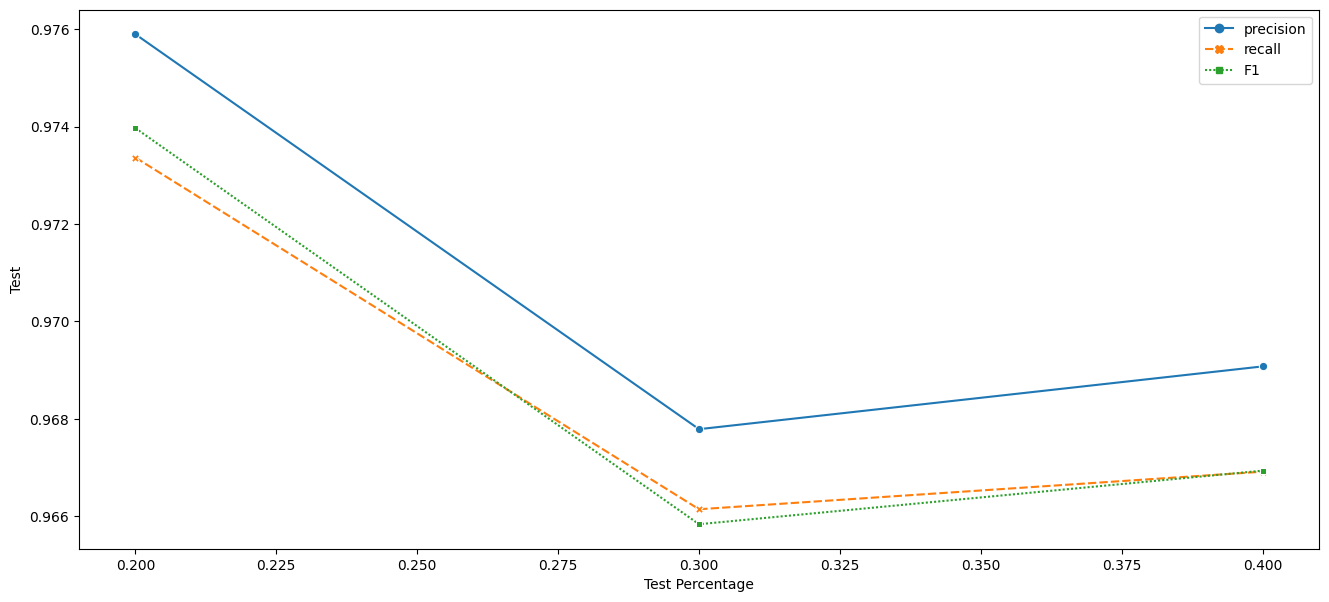

In [ ]:
plt.figure(figsize = (16,7))
df_DTree = pd.DataFrame(data_tree)
df_DTree.set_index("Test Percentage", inplace = True)
sns.lineplot(data=df_DTree, markers=True)
plt.ylabel("Test")
df_DTree

In [ ]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=["num_subscribers","num_lectures", "num_reviews","content_duration"])
print(r)

|--- num_subscribers <= 2055.00
|   |--- num_subscribers <= 333.50
|   |   |--- num_reviews <= 2.50
|   |   |   |--- num_subscribers <= 60.00
|   |   |   |   |--- num_lectures <= 14.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- num_lectures >  14.50
|   |   |   |   |   |--- content_duration <= 1.75
|   |   |   |   |   |   |--- num_lectures <= 20.50
|   |   |   |   |   |   |   |--- num_reviews <= 0.50
|   |   |   |   |   |   |   |   |--- content_duration <= 0.81
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- content_duration >  0.81
|   |   |   |   |   |   |   |   |   |--- num_subscribers <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- num_subscribers >  0.50
|   |   |   |   |   |   |   |   |   |   |--- num_subscribers <= 27.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- num_subscribers >  27.50
|   |   |

In [116]:
f=np.array([[50855,2698,15,1.5]])
print(pipeline_lr.predict(f))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Random forests**

In [ ]:
random_forst_clf=RandomForestClassifier(
    max_depth=4, random_state=0,n_estimators=200
)

In [ ]:
random_forst_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=0)

In [ ]:
y_pred=random_forst_clf.predict(X_test)

In [ ]:
random_forst_clf.score(X_train, y_train), random_forst_clf.score(X_test, y_test)

(0.8536585365853658, 0.847105393369619)

In [ ]:
f1_score(y_test,y_pred,average='macro')

0.8470621080820957

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[839 159]
 [150 873]]


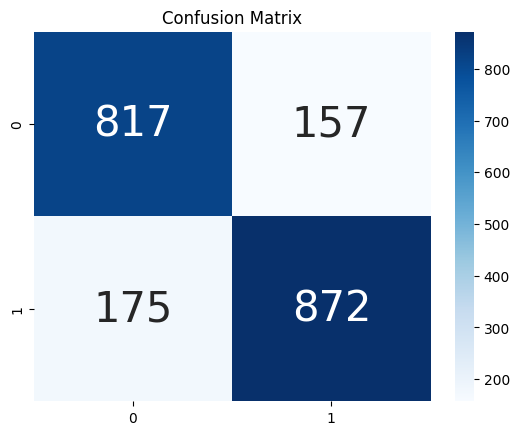

In [ ]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
X_col = X.columns
for name, score in zip(X_col, random_forst_clf.feature_importances_):
    print(name, score)

num_subscribers 0.510207173533876
num_lectures 0.19091488724852637
num_reviews 0.23504204189244104
content_duration 0.06383589732515652


In [117]:
f=np.array([[50855,2698,15,1.5]])
print(pipeline_lr.predict(f))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**SVC**

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'class_weight': ['balanced']
}
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svmModel_grid = GridSearchCV(estimator=SVC(random_state=1234, probability=True), param_grid=param_grid_svm, verbose=1, cv=10, n_jobs=-1)
svmModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [106]:
from sklearn.svm import SVC
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svm = SVC(kernel= 'linear', random_state=1, C=1000)
svm.fit(X_train_std, y_train)

SVC(C=1000, kernel='linear', random_state=1)

In [107]:
y_pred= svm.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [118]:
f=np.array([[50855,2698,15,1.5]])
print(pipeline_lr.predict(f))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [108]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[  46  952]
 [   2 1021]]


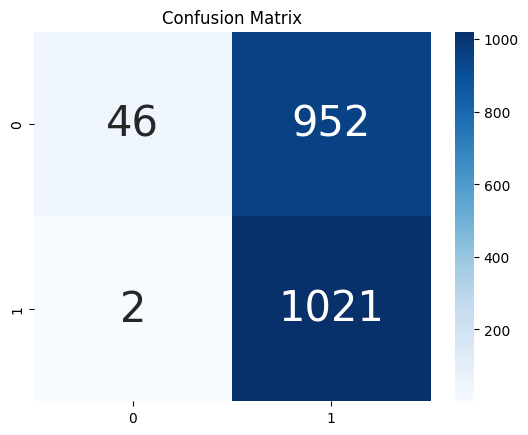

In [109]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [110]:
f1_score(y_test,y_pred,average='macro')

0.38476477240527207

In [119]:

random_forst_clf.score(X_train, y_train), random_forst_clf.score(X_test, y_test)


(0.8447507953340403, 0.8347352795645719)

**voting**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf', random_forst_clf),('cvm', svm)],voting='hard')

In [ ]:
X_train.shape
y_train=y_train.values.reshape(-1,1)

In [ ]:
voting_clf.fit(X_train,y_train)

In [ ]:
for clf in (random_forst_clf,svm,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, f1_score(y_test, y_pred))

In [ ]:
f1_score(y_test,y_pred,average='macro')

0.4014549197863174